In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
283,15663249,Female,52,21000,1
80,15595917,Male,30,80000,0
126,15610801,Male,42,65000,0
367,15671249,Male,46,88000,1
338,15810800,Female,38,55000,0


Always it is mandatory to perform train test splait befor scaling thee features

In [4]:
x = df.iloc[ : , 2:-1]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [5]:
y = df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# Performing standardization using standard scaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Point to be noted here that we have to perform fit only in x_train as fit calculated and fits mean and sd

In [8]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
np.round(X_train.describe(), 1)   # np.round is used to print only one decimal value

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Here we can see that the mean is 0 that is using standardization we are doing mean centring and sd value is 1

Now lets visualize how effect of scaling happens

# Effect of scaling

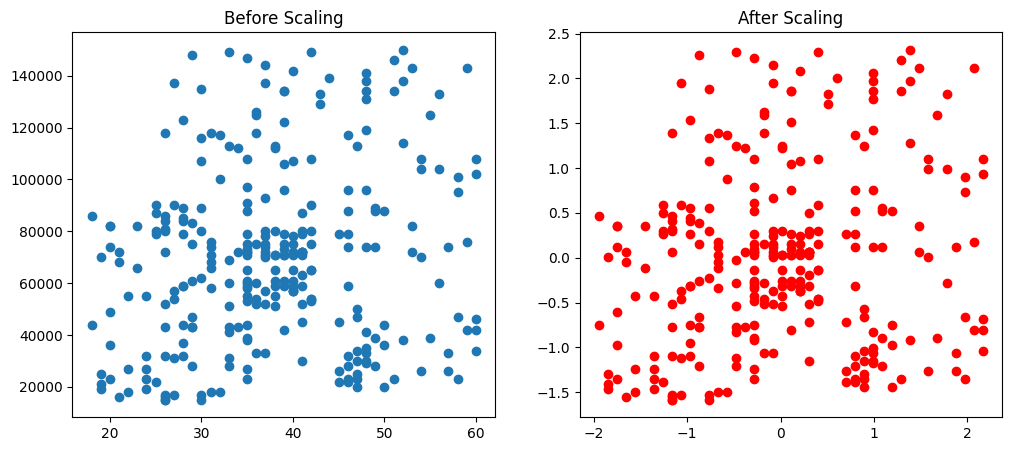

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

here we can observe that both the scatter plots are same but the scale(value) had decreased to betwenn -2 to 2

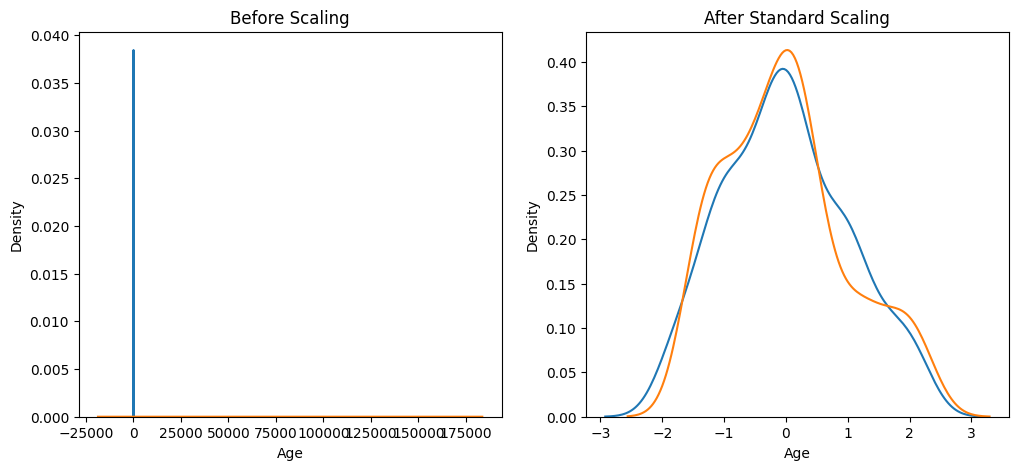

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

<Axes: title={'center': 'Age Distribution after scalling '}, xlabel='Age', ylabel='Density'>

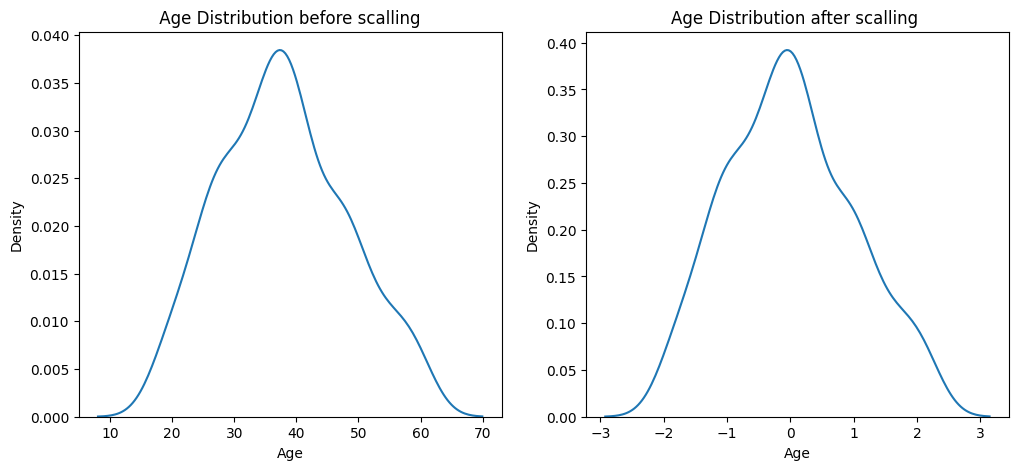

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.set_title(" Age Distribution before scalling ")
sns.kdeplot(X_train['Age'] , ax=ax1)
ax2.set_title('Age Distribution after scalling ')
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)

<Axes: title={'center': 'salary Distribution after Scalling'}, xlabel='EstimatedSalary', ylabel='Density'>

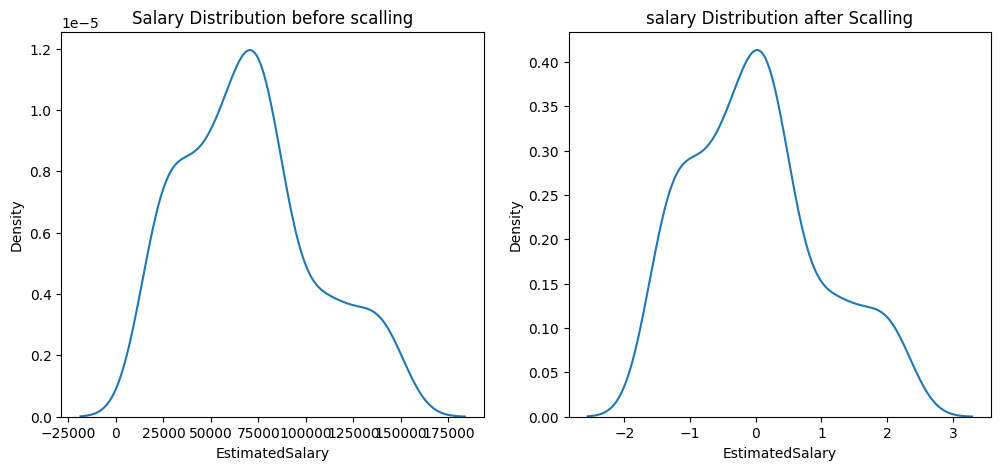

In [20]:
fig , (ax1,ax2) = plt.subplots( ncols= 2 , figsize = (12,5))

ax1.set_title('Salary Distribution before scalling')
sns.kdeplot( X_train["EstimatedSalary"] , ax= ax1)

ax2.set_title('salary Distribution after Scalling')
sns.kdeplot(X_train_scaled['EstimatedSalary'] , ax=ax2)


# Why Scalling is important

we will see why scalling is important by using a model logistic regression and checking its accuracy before and after scalling

In [21]:
from sklearn.linear_model import LogisticRegression

here we make 2 models one model we will give data of before scalling and one model we will give data of after scalling 

In [22]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)


LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

Now we will check the accuracy of both the models

In [25]:
from sklearn.metrics import accuracy_score

In [27]:
print('Actual' , accuracy_score(y_test, y_pred))
print('Scaled' , accuracy_score(y_test , y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


# Effect of outlier

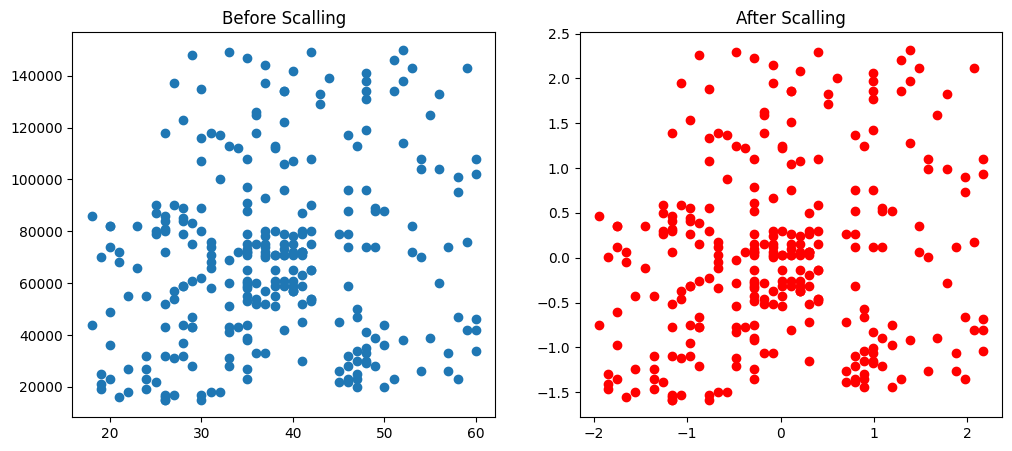

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.set_title('Before Scalling')
ax1.scatter(X_train['Age'] ,X_train["EstimatedSalary"]  )

ax2.set_title('After Scalling')
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] ,color = 'red')